In [30]:
import sys, os 
import numpy as np
sys.path.append('../pdfgpt/server/')
import parse_pdf_V2 as parser
from langchain.embeddings import HuggingFaceEmbeddings

# load book
path_to_pdf = "/Users/janek/Coding/PersonalProjects/playground/pdfGPT/assets/dobbs_v_jackson.pdf"
path_to_pdf = "/Users/janek/Coding/PersonalProjects/playground/pdfGPT/assets/orwellanimalfarm.pdf"
title = "dobbs_v_jackson.pdf"

# get paragraphs
paragraphs = parser.get_paragraphs(path_to_pdf, title)
paragraphs = [par['content'] for par in paragraphs]

# question
# query = "Who decides whether abortion is necessary to preserve a pregnant person’s life or health?"
query = "what were boxer's two favourite sayings taht he has learned from Napoleon?"

100%|███████████████████████████████████████████████████████████████████████████████████████| 2761/2761 [00:00<00:00, 1032864.19it/s]


In [31]:
# get embeddings for paragraphs and your query
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
embeddings_list = embeddings.embed_documents(paragraphs)
embeddings_list = np.array(embeddings_list)

In [35]:
# get embedding for the query
query = "Boxer's two favorite sayings that he learned from Napoleon are 'I will work harder' and 'Comrade Napoleon is always right.'" 
embedding_query = embeddings.embed_documents([query])
embedding_query = np.array(embedding_query)

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

# compute similarity metric - cosine similarity
similarity = cosine_similarity(embedding_query, embeddings_list)

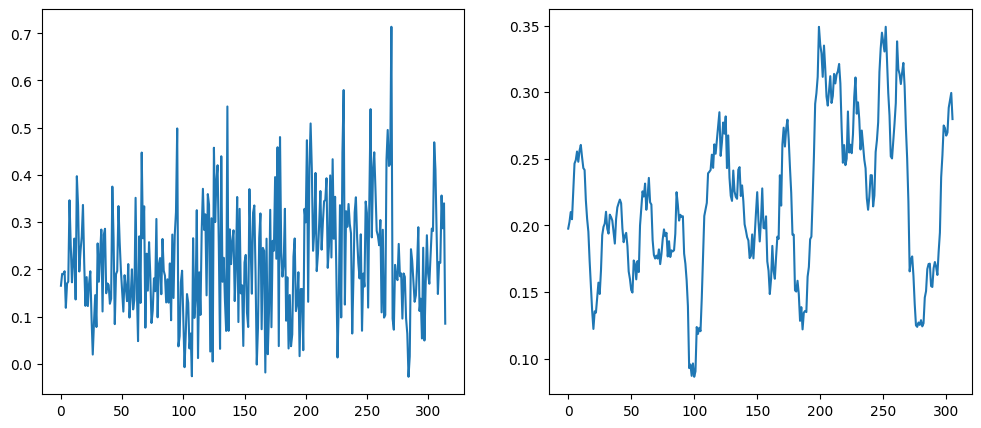

In [37]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter    

x = np.arange(embeddings_list.shape[0])
plt, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(x, similarity[0])
N = 10
y = np.convolve(similarity[0], np.ones(N)/N, mode='valid')
ax[1].plot(np.arange(len(y)), y)

In [ ]:
# retrive the most similar paragraph
# compute hte same plot but now using that paragraph instead
### i have a hypothesis that questions's grammatical structure makes it semantically dissimilar from prose.

# try the same exercise with longer praragraphs

# repeat the exercise for simpler file - orwel animal farm. 

In [1]:
import os
os.getcwd()

'/Users/janek/Coding/PersonalProjects/playground/pdfGPT/notebooks'